In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import petl as etl
import seaborn as sns
import petlx.bio
import scipy
import numpy as np

In [2]:
bf_tbl = pd.read_csv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/BFcol_vs_BFgam/putative_directional_selection_beta.tab', sep="\t")

In [3]:
gh_tbl = pd.read_csv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/GHcol_vs_GHgam/putative_directional_selection_beta.tab', sep="\t")

In [4]:
gn_tbl = pd.read_csv('/home/randomx/Dropbox/Ag1000G_carlo/notebooks/tables/hka/GNcol_vs_GNgam/putative_directional_selection_beta.tab', sep="\t")

In [45]:
tbl1 = pd.merge(bf_tbl, gh_tbl, on='gene', how='inner')


In [29]:
tbl_all = pd.merge(tbl1, gn_tbl, on='gene', how='inner')
tbl_all

,chrom_x,gene,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,chrom_y,...,score_g_y,score_tot_y,chrom,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
0,3R,AGAP007732,525,25,54.348693,633,31,81.721428,136.070122,3R,...,141.691889,221.200080,3R,63,24,132.260951,90,33,244.017154,376.278105
1,X,AGAP013341,37,10,110.595539,33,4,22.476584,133.072123,X,...,34.296035,143.259249,X,4,10,141.816646,6,4,37.270700,179.087346
2,X,AGAP001035,67,13,110.786263,109,5,11.326675,122.112938,X,...,29.059668,164.616735,X,7,13,170.783158,20,4,15.177480,185.960638
3,X,AGAP001076,119,10,38.476608,78,10,67.452917,105.929525,X,...,74.596131,122.777418,X,14,9,68.116368,11,10,128.420818,196.537186
4,3R,AGAP007736,1966,29,13.942458,2299,48,45.389196,59.331654,3R,...,77.808831,136.794567,3R,476,31,29.604631,401,51,146.455238,176.059869
5,X,AGAP001026,32,5,31.759125,39,4,19.255412,51.014538,X,...,25.002856,59.528751,X,5,5,44.844626,7,4,33.835459,78.680085
6,3R,AGAP007731,146,10,31.314540,197,8,16.770989,48.085530,3R,...,51.809349,115.169803,3R,13,11,99.745320,27,10,71.659294,171.404614


Genes shared between sympatric populations: 

- AGAP007732 -> Solute carrier family 17, member 5 (Also in Selection Atlas https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/gene/AGAP007732.html)
- AGAP013341 -> marker present in Neafsey 2010 and Aboagye-Antwi et. al 2015
- AGAP001035 -> Rapamycin-insensitive companion of mTOR
- AGAP001076 -> CYP4G16 (Cytochrome P450 associated with insecticide resistance catalyzes cuticular hydrocarbon production in Anopheles gambiae)
- AGAP007736 -> Selection Atlas H12 Gabon (https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/signal/H12/GAS/3/2/index.html)
- AGAP001026 -> Carboxypeptidase A  (Neafsey 2010)
- AGAP007731 -> ???

In [49]:
tbl_shared = tbl_all[['chrom_x',, 'score_tot_x', 'score_tot_y', 'score_tot']].rename(columns={"chrom_x": "chrom", "score_tot_x": 'score_bf', 'score_tot_y':'score_gh','score_tot': 'score_gn'})
tbl_shared

,chrom,score_bf,score_gh,score_gn
0,3R,136.070122,221.200080,376.278105
1,X,133.072123,143.259249,179.087346
2,X,122.112938,164.616735,185.960638
3,X,105.929525,122.777418,196.537186
4,3R,59.331654,136.794567,176.059869
5,X,51.014538,59.528751,78.680085
6,3R,48.085530,115.169803,171.404614


In [52]:
def bar_plot(score1,score2,score3, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    

    # set width of bar
    barWidth = 0.25

    # set height of bar
    score_bf = score1
    score_gh = score2
    score_gn = score3

    # Set position of bar on X axis
    r1 = np.arange(len(score1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, score_bf, color='#0080ff', width=barWidth, edgecolor='white', label='Burkina Faso')
    plt.bar(r2, score_gh, color='#557f2d', width=barWidth, edgecolor='white', label='Ghana')
    plt.bar(r3, score_gn, color='#ff9933', width=barWidth, edgecolor='white', label='Guinea')

    # Add xticks on the middle of the group bars
    plt.xlabel('Genes', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(score1))], ['AGAP007732', 'AGAP007736', 'AGAP007731', 'AGAP006634', 'AGAP013341', 'AGAP001035', 'AGAP001076','AGAP001026'], rotation=45)
    plt.ylabel('Total Score', fontweight='bold')

    sns.despine()
    ax.set_title(title)
    # Create legend & Show graphic
    plt.legend()
    plt.show()

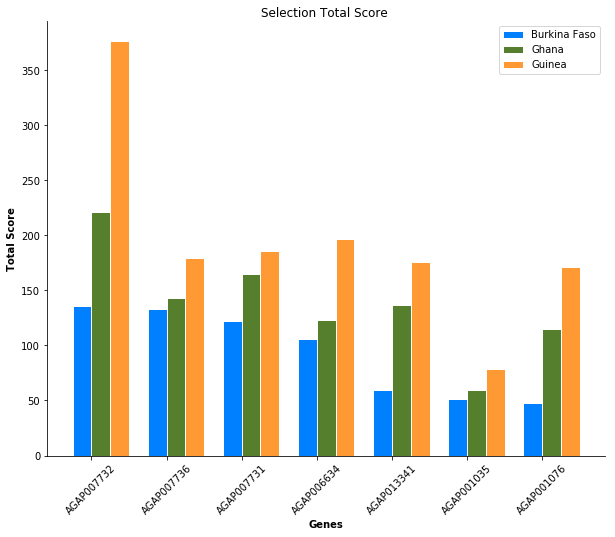

In [53]:
bar_plot(tbl_shared['score_bf'],tbl_shared['score_gh'],tbl_shared['score_gn'], 'Selection Total Score ')

-----------------------------

In [93]:
tbl_shared = tbl_all[['chrom_x','score_c_x', 'score_c_y', 'score_c']].rename(columns={"chrom_x": "chrom", "score_c_x": 'score_bf', 'score_c_y':'score_gh','score_c': 'score_gn'})
tbl_shared

,chrom,score_bf,score_gh,score_gn
0,3R,54.348693,79.508191,132.260951
1,X,110.595539,108.963213,141.816646
2,X,110.786263,135.557067,170.783158
3,X,38.476608,48.181288,68.116368
4,3R,13.942458,58.985736,29.604631
5,X,31.759125,34.525895,44.844626
6,3R,31.314540,63.360454,99.745320


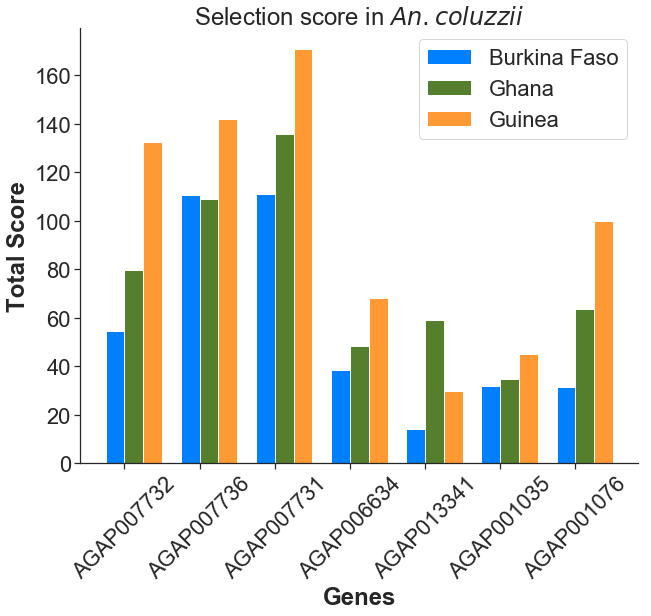

In [94]:
bar_plot(tbl_shared['score_bf'],tbl_shared['score_gh'],tbl_shared['score_gn'], 'Selection score in $\itAn.coluzzii$')

---------------------------------

In [71]:
tbl_shared = tbl_all[['chrom_x','score_g_x', 'score_g_y', 'score_g']].rename(columns={"chrom_x": "chrom", "score_g_x": 'score_bf', 'score_g_y':'score_gh','score_g': 'score_gn'})
tbl_shared

,chrom,score_bf,score_gh,score_gn
0,3R,81.721428,141.691889,244.017154
1,X,22.476584,34.296035,37.270700
2,X,11.326675,29.059668,15.177480
3,X,67.452917,74.596131,128.420818
4,3R,45.389196,77.808831,146.455238
5,X,19.255412,25.002856,33.835459
6,3R,16.770989,51.809349,71.659294


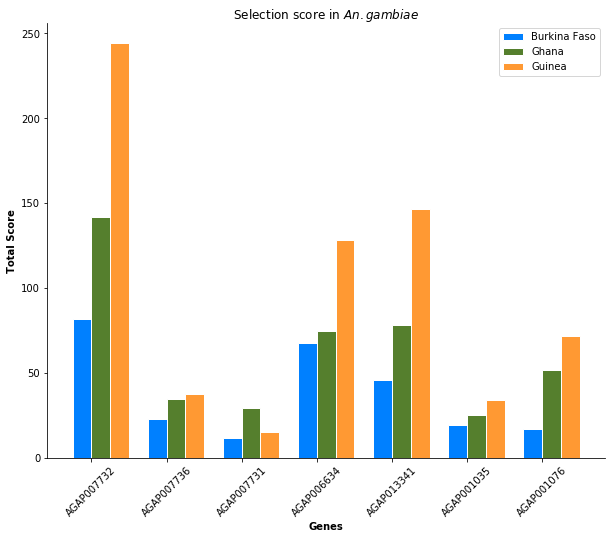

In [75]:
bar_plot(tbl_shared['score_bf'],tbl_shared['score_gh'],tbl_shared['score_gn'], "Selection score in $\it{An.gambiae}$")

---------------------------

## Genes plot

In [78]:
tbl_genes  = (etl
    .fromgff3('/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz')
    .unpackdict('attributes')
    .cut(2,3,4,9)
    .select(lambda rec: rec.type == 'gene')
    .rename('ID', 'gene')
)
tbl_genes.display(10)

type,start,end,gene
gene,157348,186936,AGAP004677
gene,203779,205293,AGAP004678
gene,207894,210460,AGAP004679
gene,271285,271815,AGAP004680
gene,358329,359280,AGAP004681
gene,433503,461627,AGAP004682
gene,485698,488369,AGAP004683
gene,493039,493543,AGAP004684
gene,493579,497632,AGAP004685
gene,742004,747057,AGAP004686


In [83]:
tbl_shared = etl.fromdataframe(tbl_all)
tbl_shared

chrom_x,gene,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,chrom_y,segreg_c_y,pri_der_fix_c_y,score_c_y,segreg_g_y,pri_der_fix_g_y,score_g_y,score_tot_y,chrom,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
3R,AGAP007732,525,25,54.3486933436,633,31,81.7214281888,136.0701215324,3R,125,23,79.50819145979999,162,32,141.691888767,221.2000802268,3R,63,24,132.26095075799998,90,33,244.017153823,376.278104581
X,AGAP013341,37,10,110.595539115,33,4,22.4765841881,133.0721233031,X,11,10,108.96321346399999,7,4,34.296035244,143.259248708,X,4,10,141.81664619999998,6,4,37.2707000598,179.0873462598
X,AGAP001035,67,13,110.786262569,109,5,11.326675418399999,122.1129379874,X,16,13,135.557066942,25,6,29.0596679629,164.6167349049,X,7,13,170.78315798100002,20,4,15.1774802724,185.9606382534
X,AGAP001076,119,10,38.4766077275,78,10,67.45291692560001,105.92952465309999,X,36,10,48.181287615500004,26,10,74.59613053380001,122.7774181493,X,14,9,68.1163676021,11,10,128.4208181,196.5371857021
3R,AGAP007736,1966,29,13.942457579400001,2299,48,45.3891959405,59.331653519899994,3R,663,47,58.9857363828,859,56,77.8088307414,136.7945671242,3R,476,31,29.604631019099998,401,51,146.455238388,176.0598694071


In [87]:
pos_hka_shared = tbl_shared.join(tbl_genes, key='gene').cut(0,1,26,27)
pos_hka_shared.displayall()

chrom_x,gene,start,end
X,AGAP001026,19721319,19723125
X,AGAP001035,19923244,19929520
X,AGAP001076,22937392,22947129
3R,AGAP007731,13603,21758
3R,AGAP007732,24056,39486
3R,AGAP007736,82151,142545
X,AGAP013341,23797952,23801974


In [88]:
import matplotlib.patches as mpatches
gff_fn = '/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.sorted.gff3.gz'



def plot_gene_annotation(chrom, start, stop, title, ax=None): 
    start = start - 1000
    stop = stop + 1000
    tabix_index= "%s:%s-%s" % (chrom, start, stop)
    gff = petlx.bio.gff3.fromgff3(gff_fn, tabix_index)
    tbl_features = (gff.unpackdict('attributes', ['ID'])
                .addfield('length', lambda r: r.end - r.start)
                )
    xranges_gene = tbl_features.selecteq('type', 'gene').values(['start', 'length']).list()
    xranges_exon = tbl_features.selecteq('type', 'exon').values(['start', 'length']).list()
    xranges_CDS = tbl_features.selecteq('type', 'CDS').values(['start', 'length']).list()

    if ax is None:
        # make a new figure here
        fig, ax = plt.subplots(figsize=(10,3))
        
    bar_gene= ax.broken_barh(xranges_gene, (0.125, 0.05), facecolors='#FF3333')    
    bar_exon= ax.broken_barh(xranges_exon, (0.1, 0.1), facecolors='#FFFF00', linewidth=0.2)
    bar_CDS = ax.broken_barh(xranges_CDS, (0.1, 0.1), facecolors='#0CF91C', linewidth=0.2)
   
    ax.set_title(title)
    ax.set_ylim(0,1)
    #ax.set_xlim(start-(gene_lenght/4), stop+(gene_lenght/4))
    ax.set_xlim(start, stop)
    ax.set_yticks([])
    cds_patch = mpatches.Patch(color='#0CF91C', label='CDS')
    exon_patch = mpatches.Patch(color='#FFFF00', label='Exon')
    intr_patch = mpatches.Patch(color='#FF3333', label='Intron')
    plt.legend(handles=[cds_patch, exon_patch, intr_patch],prop={'size':12})
    

    #ax.annotate('ciao', (21344460, 0.2), xycoords='data', xytext=(0,50),
                #textcoords='offset points', rotation=90, ha='center', va='bottom', color='k', 
                            #fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05
                                                        #))
    sns.set(style ='ticks',font_scale=2)
    sns.despine(left=True)



In [89]:
title = pos_hka_shared['gene']

In [90]:
chrom = pos_hka_shared['chrom_x']

In [91]:
start = pos_hka_shared['start']
end = pos_hka_shared['end']

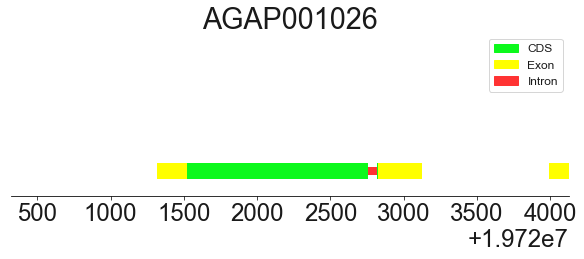

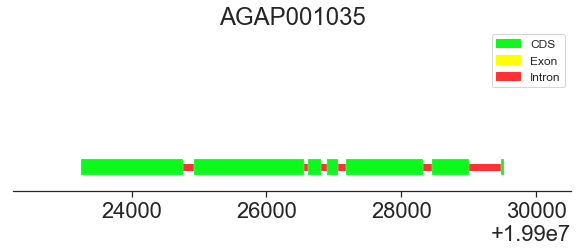

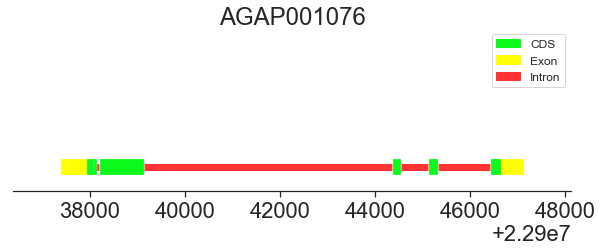

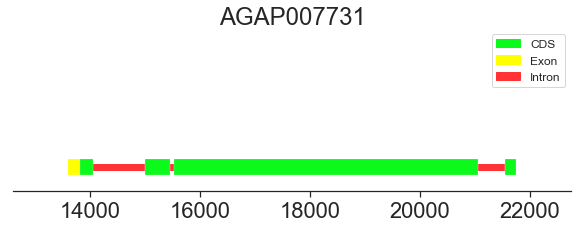

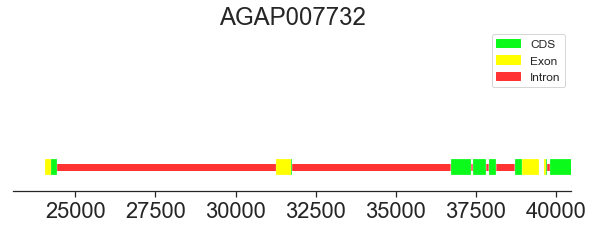

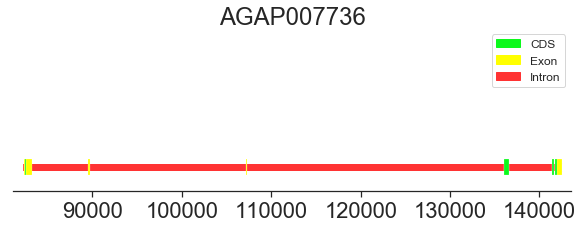

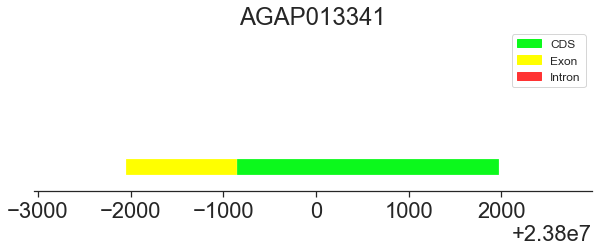

In [92]:
for i in range(len(chrom)):
    plot_gene_annotation(chrom[i], start[i], end[i], title[i])

---------------------------------